In [1]:
# POPULATION ANALYSIS - TRAINED DATA, no familiarity effect. regulation carries on

# import list
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import main_funcs as mfun
import utils_funcs as utils
import plot_funcs as pfun
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from itertools import compress
import seaborn as sns
from sklearn import preprocessing
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import glob as glob
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category= FutureWarning) 
warnings.filterwarnings("ignore", category= UserWarning) 

#paths
savefigpath  = r'G:\My Drive\Manuscripts\1 CLAStPFC\panels_raw' 
'G:\\My Drive\\Manuscripts\\3 CLAStPFC\\figuresForCLAStPFC\\figurePanels\\'
analysispath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\'

Env: clapfcstimulation



###### NAIVE DATA : cell ratios and E/I ratios
None - Total animal number for 6
All - Total animal number for 6
Sensory - Total animal number for 6
Opto - Total animal number for 6
Opto-boosted - Total animal number for 6


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 >>>> Percentage of cells per group:                    All         Act         Sup
Condition                                      
All           53.262359  100.000000  100.000000
None          46.737641  100.000000  100.000000
Opto          30.463519   28.984124   71.015876
Opto-boosted  11.383937   35.933779   64.066221
Sensory       19.697744   45.973755   54.026245
Sensory - Total animal number for 6
Sensory--> Exc vs Inh: p = 0.3125 Wilcoxon: 5.0
Opto - Total animal number for 6
Opto--> Exc vs Inh: p = 0.03125 Wilcoxon: 0.0
Opto-boosted - Total animal number for 6
Opto-boosted--> Exc vs Inh: p = 0.03125 Wilcoxon: 0.0

###### NAIVE DATA : Baseline and Summary
Pearson correlation coefficient for Visual and Visual + Opto is -0.9998983984394657 and p: 0.0 
$\Delta$ Absolute magnitude ---> [0.9660916998378299, 0.06633366633366634, 0.7653693056169837, 0.24406604747162025, 1.0]
$\Delta$ CV ---> [0.10607400855078875, 0.7756243756243756, 0.17912428129146396, 0.10607400855078875, 0.0715022

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 >>>> Percentage of cells per group:                    All         Act         Sup
Condition                                      
All           45.108969  100.000000  100.000000
None          54.891031  100.000000  100.000000
Opto          24.949509   34.617129   65.382871
Opto-boosted  10.232247   49.565323   50.434677
Sensory       17.908882   55.047003   44.952997
Sensory - Total animal number for 6
Sensory--> Exc vs Inh: p = 0.3125 Wilcoxon: 5.0
Opto - Total animal number for 6
Opto--> Exc vs Inh: p = 0.09375 Wilcoxon: 2.0
Opto-boosted - Total animal number for 6
Opto-boosted--> Exc vs Inh: p = 1.0 Wilcoxon: 10.0

###### TRAINED DATA : Baseline and Summary
$\Delta$ Absolute magnitude ---> [0.21875, 0.4375, 0.15625, 0.03125, 0.4375]
$\Delta$ CV ---> [0.5625, 0.4375, 0.5625, 0.5625, 0.15625]
$\Delta$ DTW ---> [0.5625, 0.84375, 0.0625, 0.6875, 0.6875]

###### TRAINED DATA : Correlation Matrix
                         sum_sq    df           F        PR(>F)
C(Group)               0.0

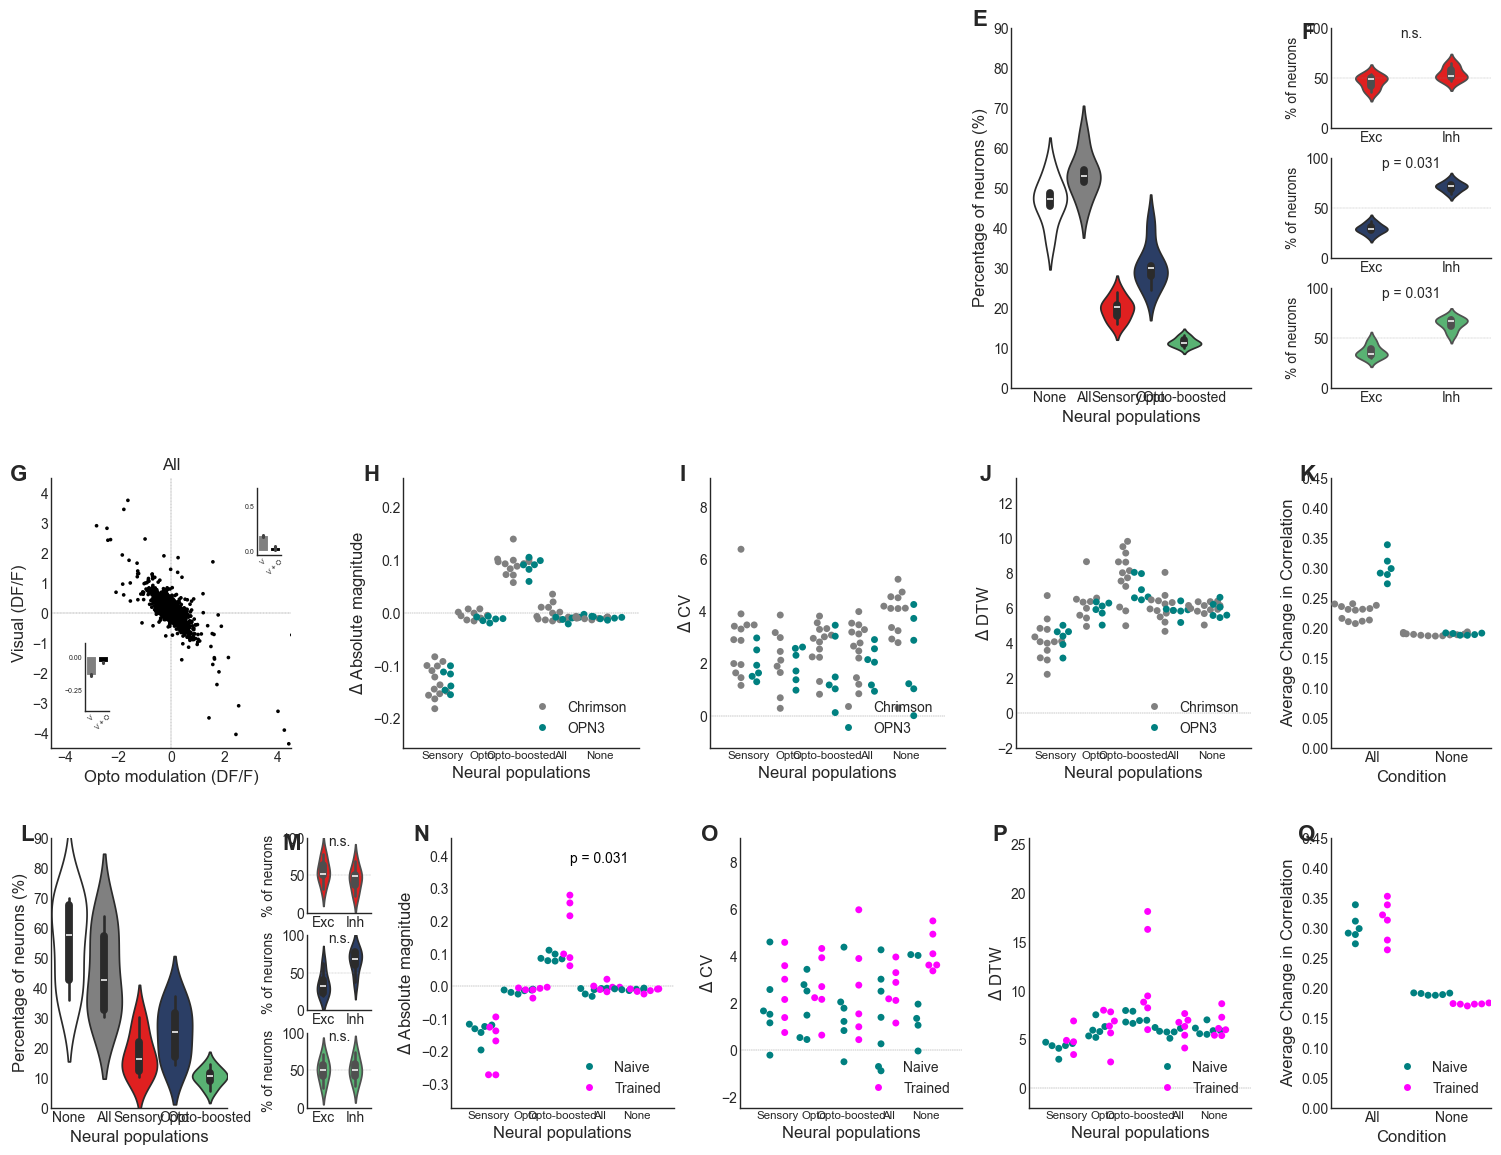

In [5]:
# Figure 5 : OPN3 mice - NAIVE & TRAINED population analysis
interestedCohort = 'OPN3'
interestedTrainedLevel = 'Naive'
plotParams = {
    'ylimitsforhist': [0, 750],
    'xlimitsforhist': [-0.75, 0.75],
    'analysis_time': 1500,  # in ms
    'colorbarlimitsForHeatMap': [-1, 1],
    'scatterplotlimits': [-4.5, 4.5],
    'ylimitsforECDF': [0.6, 1.1],
    'xlimitsforABS': [-0.1, 1.2],
    'xlimitsforCV': [-3, 3],
    'faceColors': ['black','red'],
            }

pfun.set_figure()
fig = plt.figure(constrained_layout=False, figsize=(16, 18)) # 8,11 for full A4 page

# set gridspecs
gs_cellRatiosNaive          = fig.add_gridspec(ncols=1, nrows=1, bottom=0.75, top=0.95, left=0.65, right=0.80,
                              wspace=0.3, hspace=0.4)
gs_E_I_RatiosNaive          = fig.add_gridspec(ncols=1, nrows=3, bottom=0.75, top=0.95, left=0.85, right=0.95,
                              wspace=0.2, hspace=0.3)

gs_Baseline                 = fig.add_gridspec(ncols=1, nrows=1, bottom=0.55, top=0.70, left=0.05, right=0.20, 
                              wspace=0.3, hspace=0.1)
gs_Summary                  = fig.add_gridspec(ncols=3, nrows=1, bottom=0.55, top=0.70, left=0.27, right=0.80, 
                              wspace=0.3, hspace=0.1)
gs_correlationMean          = fig.add_gridspec(ncols=1, nrows=1, bottom=0.55, top=0.70, left=0.85, right=0.95, 
                               wspace=0.4, hspace=0.1)


gs_cellRatiosTrained        = fig.add_gridspec(ncols=1, nrows=1, bottom=0.35, top=0.50, left=0.05, right=0.16,
                              wspace=0.3, hspace=0.4)
gs_E_I_RatiosTrained        = fig.add_gridspec(ncols=1, nrows=3, bottom=0.35, top=0.50, left=0.21, right=0.25,
                              wspace=0.2, hspace=0.3)
gs_SummaryT                 = fig.add_gridspec(ncols=3, nrows=1, bottom=0.35, top=0.50, left=0.30, right=0.80, 
                              wspace=0.3, hspace=0.1)
gs_correlationMeanT         = fig.add_gridspec(ncols=1, nrows=1, bottom=0.35, top=0.50, left=0.85, right=0.95, 
                               wspace=0.4, hspace=0.1)


####### NAIVE DATA
print('\n###### NAIVE DATA : cell ratios and E/I ratios')
interestedTrainedLevel = 'Naive'
total_num_axis = gs_cellRatiosNaive.get_geometry()[0]* gs_cellRatiosNaive.get_geometry()[1]
ax_gs_cellRatiosNaive = {xx: fig.add_subplot(gs_cellRatiosNaive[xx]) for xx in range(total_num_axis)}
pfun.plot_cellRatiosPerAnimal('All', [interestedCohort],[interestedTrainedLevel], ax=ax_gs_cellRatiosNaive[0], 
                              savefigname=None, savefigpath=None)

#  Barplot for cell ratios
total_num_axis = gs_E_I_RatiosNaive.get_geometry()[0]* gs_E_I_RatiosNaive.get_geometry()[1]
ax_gs_E_I_Ratios = {xx: fig.add_subplot(gs_E_I_RatiosNaive[xx]) for xx in range(3)}
pfun.plot_cellRatiosPerAnimal('Sensory', [interestedCohort], [interestedTrainedLevel], ax=ax_gs_E_I_Ratios[0],
                              savefigname=None, savefigpath=None, ComparePlot = False)
pfun.plot_cellRatiosPerAnimal('Opto', [interestedCohort], [interestedTrainedLevel], ax=ax_gs_E_I_Ratios[1],
                              savefigname=None, savefigpath=None, ComparePlot = False)
pfun.plot_cellRatiosPerAnimal('Opto-boosted', [interestedCohort], [interestedTrainedLevel], ax=ax_gs_E_I_Ratios[2],
                              savefigname=None, savefigpath=None, ComparePlot = False)

########### Comparison of Silenced vs Activated
print('\n###### NAIVE DATA : Baseline and Summary')
total_num_axis = gs_Baseline.get_geometry()[0]* gs_Baseline.get_geometry()[1]
ax_gs_Baseline = {xx: fig.add_subplot(gs_Baseline[xx]) for xx in range(total_num_axis)}

plotParams['faceColors'] = ['grey','black']
pfun.scatterModulationvsBaseFiring('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='All', plotParams = plotParams,
                       axisAll=ax_gs_Baseline[0])


total_num_axis = gs_Summary.get_geometry()[0]* gs_Summary.get_geometry()[1]
ax_gs_Summary = {xx: fig.add_subplot(gs_Summary[xx]) for xx in range(total_num_axis)}
pfun.plot_paramsDiffPerAnimal('ABS', ['Chrimson','OPN3'], ['Naive'], ax= ax_gs_Summary[0], savefigname=None, savefigpath=None, ComparePlot= True,acrossCohort = True)
pfun.plot_paramsDiffPerAnimal('CV',  ['Chrimson','OPN3'], ['Naive'], ax= ax_gs_Summary[1], savefigname=None, savefigpath=None, ComparePlot= True,acrossCohort = True)
pfun.plot_paramsDiffPerAnimal('DTW', ['Chrimson','OPN3'], ['Naive'], ax= ax_gs_Summary[2], savefigname=None, savefigpath=None, ComparePlot= True,acrossCohort = True)

print('\n###### NAIVE DATA : Correlation Matrix')
total_num_axis = gs_correlationMean.get_geometry()[0]* gs_correlationMean.get_geometry()[1]
ax_gs_correlationMean = {xx: fig.add_subplot(gs_correlationMean[xx]) for xx in range(total_num_axis)}
corrDiff = pfun.plot_correlationMatrix_meanChange(['Naive'], cohorts=['Chrimson','OPN3'], 
                        responsiveness=['All', 'None'], params = 'All', axs=ax_gs_correlationMean[0],
                        savefigname=None, savefigpath=None,acrossCohort = True)

##### Next row: TRAINED DATA
print('\n###### TRAINED DATA : cell ratios and E/I ratios')
interestedTrainedLevel = 'Trained'
total_num_axis = gs_cellRatiosTrained.get_geometry()[0]* gs_cellRatiosTrained.get_geometry()[1]
ax_gs_cellRatiosTrained = {xx: fig.add_subplot(gs_cellRatiosTrained[xx]) for xx in range(total_num_axis)}
pfun.plot_cellRatiosPerAnimal('All', [interestedCohort],[interestedTrainedLevel], ax=ax_gs_cellRatiosTrained[0], 
                              savefigname=None, savefigpath=None, ComparePlot = False)
ax_gs_cellRatiosTrained[0].set_xlim([-0.5, 4.5])

#  Barplot for cell ratios
total_num_axis = gs_E_I_RatiosTrained.get_geometry()[0]* gs_E_I_RatiosTrained.get_geometry()[1]
ax_gs_E_I_RatiosTr = {xx: fig.add_subplot(gs_E_I_RatiosTrained[xx]) for xx in range(3)}
pfun.plot_cellRatiosPerAnimal('Sensory', [interestedCohort], [interestedTrainedLevel], ax=ax_gs_E_I_RatiosTr[0],
                              savefigname=None, savefigpath=None,ComparePlot = False)
pfun.plot_cellRatiosPerAnimal('Opto', [interestedCohort], [interestedTrainedLevel], ax=ax_gs_E_I_RatiosTr[1],
                              savefigname=None, savefigpath=None,ComparePlot = False)
pfun.plot_cellRatiosPerAnimal('Opto-boosted', [interestedCohort], [interestedTrainedLevel], ax=ax_gs_E_I_RatiosTr[2],
                              savefigname=None, savefigpath=None,ComparePlot = False)

###### Trained vs Naive Comparison
print('\n###### TRAINED DATA : Baseline and Summary')
total_num_axis = gs_SummaryT.get_geometry()[0]* gs_SummaryT.get_geometry()[1]
ax_gs_SummaryT = {xx: fig.add_subplot(gs_SummaryT[xx]) for xx in range(total_num_axis)}
pfun.plot_paramsDiffPerAnimal('ABS', [interestedCohort], ['Naive', 'Trained'], ax= ax_gs_SummaryT[0], savefigname=None, savefigpath=None, ComparePlot= True)
pfun.plot_paramsDiffPerAnimal('CV',  [interestedCohort], ['Naive', 'Trained'], ax= ax_gs_SummaryT[1], savefigname=None, savefigpath=None, ComparePlot= True)
pfun.plot_paramsDiffPerAnimal('DTW',  [interestedCohort], ['Naive', 'Trained'], ax= ax_gs_SummaryT[2], savefigname=None, savefigpath=None, ComparePlot= True)

print('\n###### TRAINED DATA : Correlation Matrix')
total_num_axis = gs_correlationMeanT.get_geometry()[0]* gs_correlationMeanT.get_geometry()[1]
ax_gs_correlationMeanT = {xx: fig.add_subplot(gs_correlationMeanT[xx]) for xx in range(total_num_axis)}
corrDiff = pfun.plot_correlationMatrix_meanChange(['Naive', 'Trained'], cohorts=[interestedCohort], 
                        responsiveness=['All', 'None'], params = 'All',
                       axs=ax_gs_correlationMeanT[0], savefigname=None, savefigpath=None)
#Lets add the labels
axes = [ax_gs_cellRatiosNaive, ax_gs_E_I_Ratios,ax_gs_Baseline, ax_gs_Summary, ax_gs_correlationMean,
        ax_gs_cellRatiosTrained, ax_gs_E_I_RatiosTr, ax_gs_SummaryT, ax_gs_correlationMeanT]
labels = ['E','F','','','G','H','I','J','K','L','M','','','N','O','P',
            'Q','R','S','T','U','V','W','X','Y','Z']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        ax[key].text(-0.1, 1.05, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
            fontweight='bold', va='top', ha='right',
            bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1
savefigname = 'Figure5_OPN3_PopulationAnalysis'
pfun.save_figure(savefigname,savefigpath)
#plt.close()


Sensory : 1.4997654123272266e-39
Opto-boosted : 1.2774381803924608e-125
Opto : 7.453771260443829e-215
Sensory : 9.246719028582465e-20
Opto-boosted : 2.606898974028944e-88
Opto : 1.7529992288112837e-133


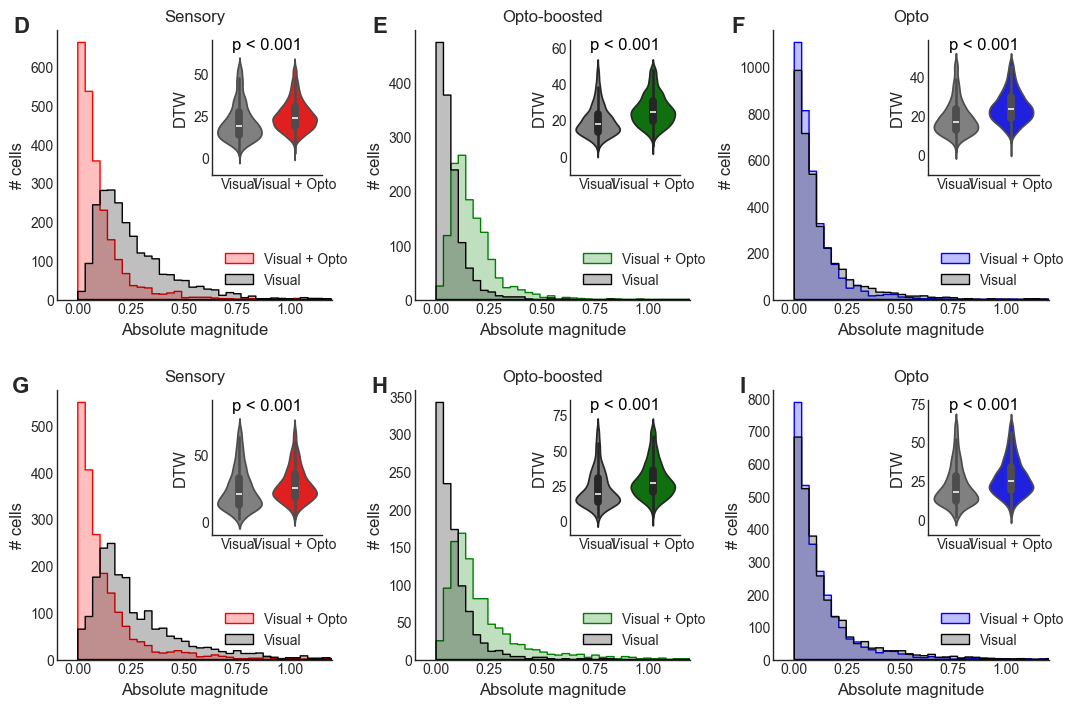

In [3]:
# Supplementary Figure 5: OPN3 mice - NAIVE & TRAINED population analysis
interestedCohort = 'OPN3'
plotParams = {
    'ylimitsforhist': [0, 750],
    'xlimitsforhist': [-0.75, 0.75],
    'analysis_time': 1500,  # in ms
    'colorbarlimitsForHeatMap': [-1, 1],
    'scatterplotlimits': [-4.5, 4.5],
    'ylimitsforECDF': [0.6, 1.1],
    'xlimitsforABS': [-0.1, 1.2],
    'xlimitsforCV': [-3, 3],
    'faceColors': ['black','red'],
            }

pfun.set_figure()
fig = plt.figure(constrained_layout=False, figsize=(16, 18)) # 8,11 for full A4 page

# Histograms
gs_histogramsNaive          = fig.add_gridspec(ncols=3, nrows=1, bottom=0.45, top=0.60, left=0.33, right=0.95,
                                wspace=0.3, hspace=0.4)
gs_histogramsTrained        = fig.add_gridspec(ncols=3, nrows=1, bottom=0.25, top=0.40, left=0.33, right=0.95,
                                wspace=0.3, hspace=0.4)

# Histograms for naive
interestedTrainedLevel = 'Naive'
plotParams['faceColors'] = ['black', 'red']
total_num_axis = gs_histogramsNaive.get_geometry()[0]* gs_histogramsNaive.get_geometry()[1]
ax_gs_histogramNaive = {xx: fig.add_subplot(gs_histogramsNaive[xx]) for xx in range(total_num_axis)}
plotParams['ylimitsforECDF'] = [0.45, 1.1]
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Sensory',
                    plotParams = plotParams,axisAll=ax_gs_histogramNaive[0])

plotParams['faceColors'] = ['black', 'green']
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Opto-boosted',
                    plotParams = plotParams,axisAll=ax_gs_histogramNaive[1])
plotParams['faceColors'] = ['black', 'blue']
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Opto',
                    plotParams = plotParams,axisAll=ax_gs_histogramNaive[2])

# Histograms for trained
interestedTrainedLevel = 'Trained'
plotParams['faceColors'] = ['black', 'red']
total_num_axis = gs_histogramsTrained.get_geometry()[0]* gs_histogramsTrained.get_geometry()[1]
ax_gs_histogramsTrained = {xx: fig.add_subplot(gs_histogramsTrained[xx]) for xx in range(total_num_axis)}
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Sensory',
                    plotParams = plotParams,axisAll=ax_gs_histogramsTrained[0])
plotParams['faceColors'] = ['black', 'green']
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Opto-boosted',
                    plotParams = plotParams,axisAll=ax_gs_histogramsTrained[1])
plotParams['faceColors'] = ['black', 'blue']
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Opto',
                    plotParams = plotParams,axisAll=ax_gs_histogramsTrained[2])

# Lets add the labels
axes = [ ax_gs_histogramNaive, ax_gs_histogramsTrained]
labels = ['D','E','F','G','H','I','J','K','L','M','N','O','P',
            'Q','R','S','T','U','V','W','X','Y','Z']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        ax[key].text(-0.1, 1.05, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
            fontweight='bold', va='top', ha='right',
            bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1
savefigname = 'Figure5supplementary1_OPN3_PopulationAnalysis'
pfun.save_figure(savefigname,savefigpath)
